In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

In [2]:
#reading dataset
df=pd.read_csv("uber.csv")
print("DATASET",df.head(5))
print()
print()
#dataset has 2 additional coloumns so drop the unwanted 2
df=df.drop(["key","Unnamed: 0"],axis=1)
print(" 7 coloumn DATASET",df)
#check the basics like shape ,coloumn names,info,datatypes 
print("SHAPE of data set",df.shape)
print()
print("COLOUMNS",df.columns)
print()
print("INFO",df.info())
print()
print("DATATYPES",df.dtypes)

DATASET    Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3 

In [3]:
#pickup_datetime is object type convert to datetime type
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
#check converted type
print(df.dtypes)
print()
print(df.describe())

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603

In [4]:
#null values
df.isnull()
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
#drop null values
df.dropna(inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [20]:
#To show correlation between variable find correlation matrix and then plot a heat map
cormat=df.corr()
print(cormat.round(2))

                   fare_amount  pickup_datetime  pickup_longitude  \
fare_amount               1.00             0.12              0.01   
pickup_datetime           0.12             1.00              0.01   
pickup_longitude          0.01             0.01              1.00   
pickup_latitude          -0.01            -0.01             -0.82   
dropoff_longitude         0.01             0.01              0.83   
dropoff_latitude         -0.01            -0.01             -0.85   
passenger_count           0.01             0.01             -0.00   
hour                     -0.02             0.00              0.00   
day                       0.00            -0.00              0.01   
weekday                  -0.01            -0.00             -0.00   
month                     0.02             0.04             -0.00   
year                      0.12             0.99              0.01   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
fare_amount                

<AxesSubplot:>

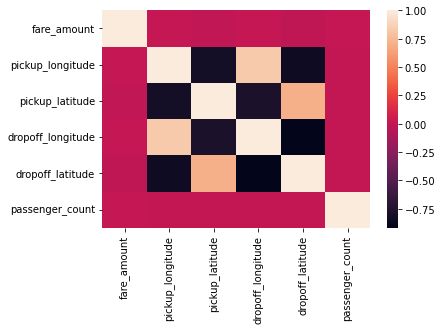

In [7]:
sns.heatmap(cormat)

In [8]:
import calendar
df["hour"]=df["pickup_datetime"].apply(lambda x:x.hour)
df["day"]=df["pickup_datetime"].apply(lambda x:x.day)
df["weekday"]=df["pickup_datetime"].apply(lambda x:calendar.day_name[x.weekday()])
df["month"]=df["pickup_datetime"].apply(lambda x:x.month)
df["year"]=df["pickup_datetime"].apply(lambda x:x.year)

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,weekday,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,Thursday,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,Friday,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,Monday,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,Friday,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,Thursday,8,2014


In [10]:
df.weekday=df.weekday.map({"Sunday":0,"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6})

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,weekday,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,4,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,5,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,1,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,5,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,4,8,2014


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
 7   hour               199999 non-null  int64              
 8   day                199999 non-null  int64              
 9   weekday            199999 non-null  int64              
 10  month              199999 non-null  int64              
 11  year               199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), flo

In [24]:
print(df.shape)
df["pickup_datetime"]=pd.to_numeric(df.pickup_datetime)
df.dtypes

(199999, 12)


fare_amount          float64
pickup_datetime        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
weekday                int64
month                  int64
year                   int64
dtype: object

In [14]:
#model build
from sklearn.model_selection import train_test_split
x=df.drop("fare_amount",axis=1)#x=df.iloc[:,:-1]
y=df.fare_amount#y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Predicted Values",pred)

Predicted Values [ 9.80595731 11.95157306 11.19441039 ... 11.37939557 11.97723719
 11.80060806]


In [16]:
#metrics
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(pred,y_test))



9.983351503673067
-66.21028496142559
5.964219908447942


In [17]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor()
re.fit(x_train,y_train)
predi=re.predict(x_test)
print(predi)

[ 7.242  21.4433  6.742  ... 30.6019 18.8161  8.296 ]


In [18]:
rmse=np.sqrt(mean_squared_error(predi,y_test))

In [19]:
print(rmse)
print(r2_score(predi,y_test))

4.86451853645134
0.6864912335908628
